# FFT Polynomial
## 

In [7]:
import numpy as np

def FFT(P):
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(2j * np.pi / n)
    P_e = P[0::2]
    P_o = P[1::2]
    y_e = FFT(P_e)
    y_o = FFT(P_o)
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = y_e[j] + omega**j * y_o[j]
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]
    return y
    
if __name__=="__main__":
    # Example polynomial P(x) = x^7 + 2x^6 + 3x^5 + 4x^4 + 5x^3 + 6x^2 + 7x + 8
    # Coefficient representation: [8, 7, 6, 5, 4, 3, 2, 1]
    poly = np.array([8, 7, 6, 5, 4, 3, 2, 1], dtype=complex)
    
    # Call FFT
    result = FFT(poly)
    print("FFT result:", result)
    
    # Compute corresponding x values (unit roots)
    n = len(poly)
    omega = np.exp(2j * np.pi / n)
    x_values = [omega**j for j in range(n)]
    
    # Print (x, y) pairs
    print("Polynomial point-value representation (x, y):")
    for x, y in zip(x_values, result):
        print(f"({x}, {y})")

FFT result: [36.+0.j          4.+9.65685425j  4.+4.j          4.+1.65685425j
  4.+0.j          4.-1.65685425j  4.-4.j          4.-9.65685425j]
Polynomial point-value representation (x, y):
((1+0j), (36+0j))
((0.7071067811865476+0.7071067811865476j), (4+9.65685424949238j))
(1.0000000000000002j, (4+4.000000000000001j))
((-0.7071067811865477+0.7071067811865477j), (4+1.6568542494923815j))
((-1.0000000000000004+0j), (4+0j))
((-0.7071067811865479-0.7071067811865479j), (4-1.6568542494923806j))
((-0-1.0000000000000007j), (4-4.000000000000001j))
((0.707106781186548-0.707106781186548j), (3.999999999999999-9.656854249492381j))


In [19]:
import numpy as np

def FFT(P):
    """Compute the FFT of a polynomial P."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(2j * np.pi / n)
    P_e = P[0::2]
    P_o = P[1::2]
    y_e = FFT(P_e)
    y_o = FFT(P_o)
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = y_e[j] + omega**j * y_o[j]
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]
    return y

def IFFT(P):
    """Compute the inverse FFT of a polynomial P with normalization."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(-2j * np.pi / n)
    P_e = P[0::2]
    P_o = P[1::2]
    y_e = IFFT(P_e)
    y_o = IFFT(P_o)
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = y_e[j] + omega**j * y_o[j]
        y[j]=y[j]/2
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]
        y[j + n // 2]=y[j + n // 2]/2
    # Normalize the result by dividing by n at each level of recursion
    return y

if __name__ == "__main__":
    # Example polynomial P(x) = x^7 + 2x^6 + 3x^5 + 4x^4 + 5x^3 + 6x^2 + 7x + 8
    # Coefficient representation: [8, 7, 6, 5, 4, 3, 2, 1]
    poly = np.array([8, 7, 6, 5, 4, 3, 2, 1], dtype=complex)
    
    # Call FFT to get point values
    point_values = FFT(poly)
    print("FFT result:", point_values)
    
    # Compute corresponding x values (unit roots)
    n = len(poly)
    omega = np.exp(2j * np.pi / n)
    x_values = [omega**j for j in range(n)]
    
    # Print (x, y) pairs
    print("Polynomial point-value representation (x, y):")
    for x, y in zip(x_values, point_values):
        print(f"({x}, {y})")
    
    # Call IFFT to get back to coefficient representation
    reconstructed_coefficients = IFFT(point_values)
    print("\nReconstructed Coefficient representation (a):")
    for i, coef in enumerate(reconstructed_coefficients):
        print(f"a_{i} = {coef.real:.2f} + {coef.imag:.2f}i")


FFT result: [36.+0.j          4.+9.65685425j  4.+4.j          4.+1.65685425j
  4.+0.j          4.-1.65685425j  4.-4.j          4.-9.65685425j]
Polynomial point-value representation (x, y):
((1+0j), (36+0j))
((0.7071067811865476+0.7071067811865476j), (4+9.65685424949238j))
(1.0000000000000002j, (4+4.000000000000001j))
((-0.7071067811865477+0.7071067811865477j), (4+1.6568542494923815j))
((-1.0000000000000004+0j), (4+0j))
((-0.7071067811865479-0.7071067811865479j), (4-1.6568542494923806j))
((-0-1.0000000000000007j), (4-4.000000000000001j))
((0.707106781186548-0.707106781186548j), (3.999999999999999-9.656854249492381j))

Reconstructed Coefficient representation (a):
a_0 = 8.00 + -0.00i
a_1 = 7.00 + -0.00i
a_2 = 6.00 + -0.00i
a_3 = 5.00 + 0.00i
a_4 = 4.00 + 0.00i
a_5 = 3.00 + 0.00i
a_6 = 2.00 + 0.00i
a_7 = 1.00 + -0.00i


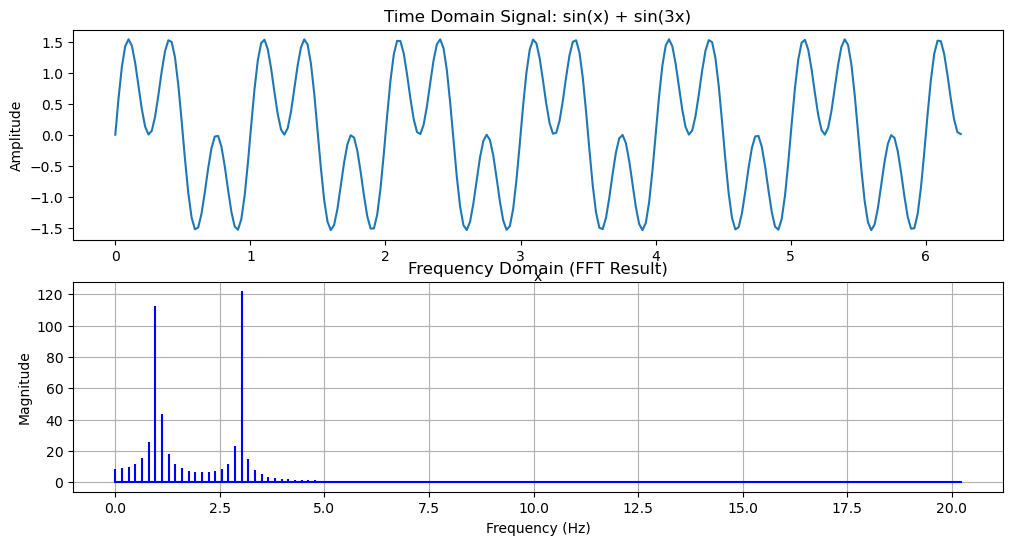

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the FFT of a polynomial P."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(2j * np.pi / n)
    P_e = P[0::2]
    P_o = P[1::2]
    y_e = FFT(P_e)
    y_o = FFT(P_o)
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = y_e[j] + omega**j * y_o[j]
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]
    return y

def IFFT(P):
    """Compute the inverse FFT of a polynomial P with normalization."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(-2j * np.pi / n)
    P_e = P[0::2]
    P_o = P[1::2]
    y_e = IFFT(P_e)
    y_o = IFFT(P_o)
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = y_e[j] + omega**j * y_o[j]
        y[j] = y[j] / 2
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]
        y[j + n // 2] = y[j + n // 2] / 2
    return y

# 生成信号 sin(x) + sin(3x)
N = 256  # 采样点数
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
y = np.sin(2*np.pi*x) + np.sin(3 *2*np.pi* x)

# 调用 FFT 函数
fft_result = FFT(y)

# 自己计算频率值
T = x[1] - x[0]  # 采样间隔
frequencies = np.arange(N) / (N * T)

# 绘制时域信号
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title("Time Domain Signal: sin(x) + sin(3x)")
plt.xlabel("x")
plt.ylabel("Amplitude")

# 绘制 FFT 结果的频谱图（取 FFT 结果的绝对值）
plt.subplot(2, 1, 2)
plt.stem(frequencies[:N // 2], np.abs(fft_result[:N // 2]), 'b', markerfmt=" ", basefmt="-b")
plt.title("Frequency Domain (FFT Result)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


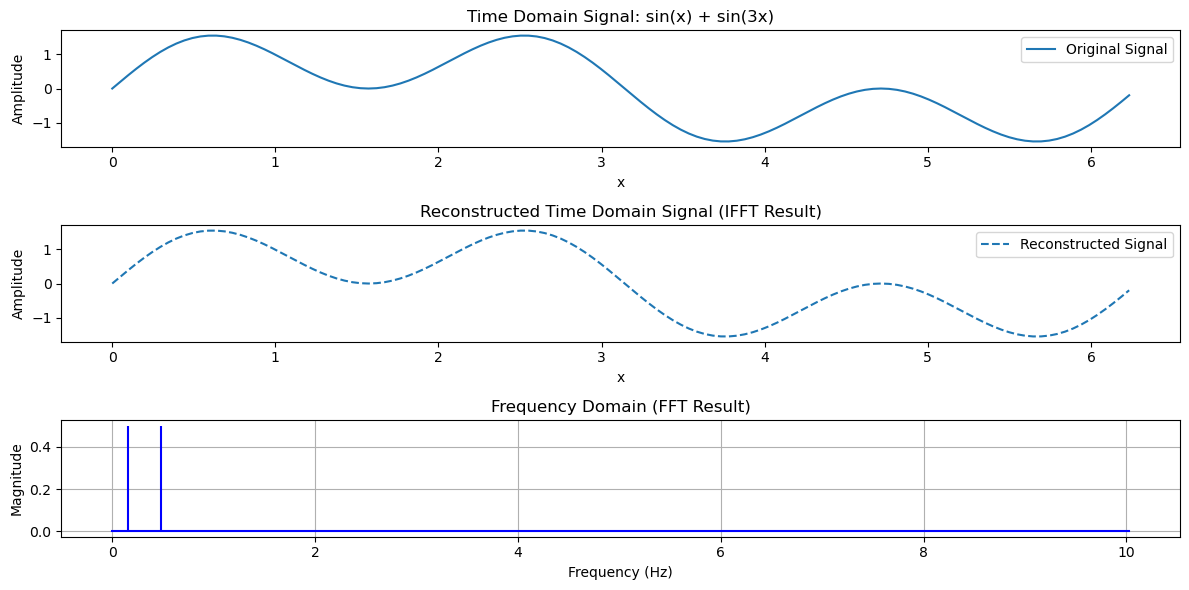

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the FFT of a polynomial P."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(-2j * np.pi / n)
    P_e = FFT(P[0::2])
    P_o = FFT(P[1::2])
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j] = y[j]/2
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]
        y[j + n // 2]=y[j + n // 2]/2
    return y

def IFFT(P):
    """Compute the inverse FFT of a polynomial P with normalization."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(2j * np.pi / n)
    P_e = IFFT(P[0::2])
    P_o = IFFT(P[1::2])
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]
    return y

# Generate signal sin(x) + sin(3x)
N = 128  # Number of sample points
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
y = np.sin(x) + np.sin(3 * x)

# Call FFT function
fft_result = FFT(y)

# Call IFFT function to verify reconstruction
reconstructed_signal = IFFT(fft_result)

# Manually calculate frequency values
T = 2 * np.pi / N  # Sampling interval (since x ranges from 0 to 2π)
frequencies = np.arange(N) / (N * T)
frequencies = frequencies[:N // 2]  # Take only the first half of the spectrum

# Plot time domain signal and reconstructed signal
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(x, y, label='Original Signal')
plt.title("Time Domain Signal: sin(x) + sin(3x)")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x, reconstructed_signal.real, label='Reconstructed Signal', linestyle='--')
plt.title("Reconstructed Time Domain Signal (IFFT Result)")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()

# Plot FFT result (magnitude)
plt.subplot(3, 1, 3)
plt.stem(frequencies, np.abs(fft_result[:N // 2]), 'b', markerfmt=" ", basefmt="-b")
plt.title("Frequency Domain (FFT Result)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.tight_layout()
plt.show()


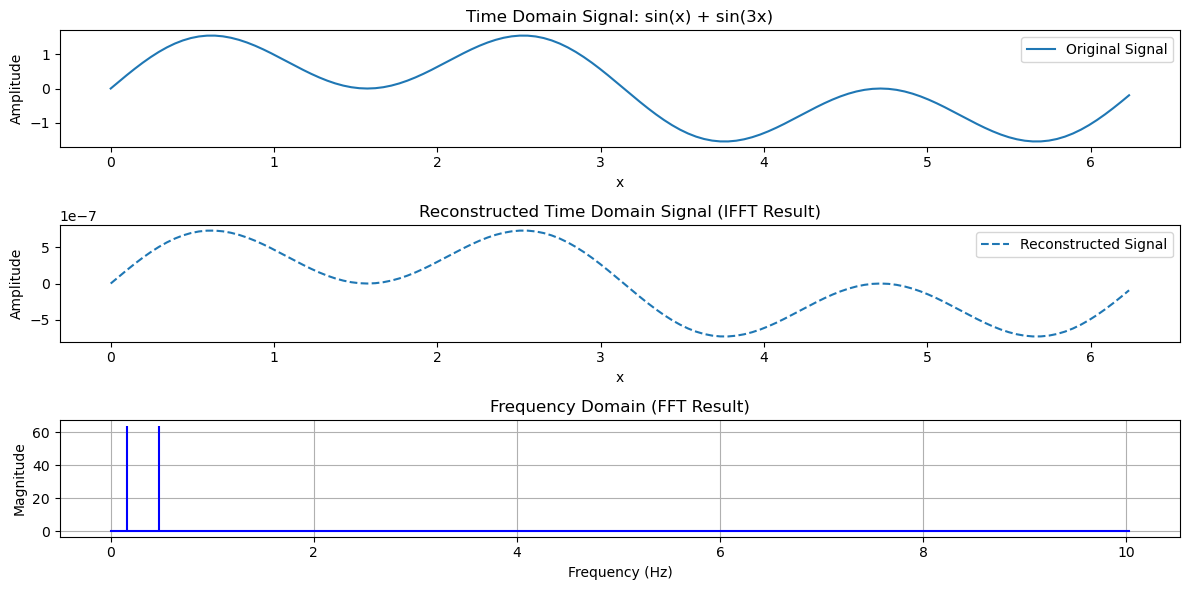

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the FFT of a polynomial P."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(-2j * np.pi / n)
    P_e = FFT(P[0::2])
    P_o = FFT(P[1::2])
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]
    return y

def IFFT(P):
    """Compute the inverse FFT of a polynomial P with normalization."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(2j * np.pi / n)
    P_e = IFFT(P[0::2])
    P_o = IFFT(P[1::2])
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]
    return y / n

# Generate signal sin(x) + sin(3x)
N = 128  # Number of sample points
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
y = np.sin(x) + np.sin(3 * x)

# Call FFT function
fft_result = FFT(y)

# Call IFFT function to verify reconstruction
reconstructed_signal = IFFT(fft_result)

# Manually calculate frequency values
T = (x[1] - x[0])  # Sampling interval
frequencies = np.fft.fftfreq(N, d=T)
frequencies = frequencies[:N // 2]  # Take only the first half of the spectrum

# Plot time domain signal and reconstructed signal
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(x, y, label='Original Signal')
plt.title("Time Domain Signal: sin(x) + sin(3x)")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x, reconstructed_signal.real, label='Reconstructed Signal', linestyle='--')
plt.title("Reconstructed Time Domain Signal (IFFT Result)")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()

# Plot FFT result (magnitude)
plt.subplot(3, 1, 3)
plt.stem(frequencies, np.abs(fft_result[:N // 2]), 'b', markerfmt=" ", basefmt="-b")
plt.title("Frequency Domain (FFT Result)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.tight_layout()
plt.show()


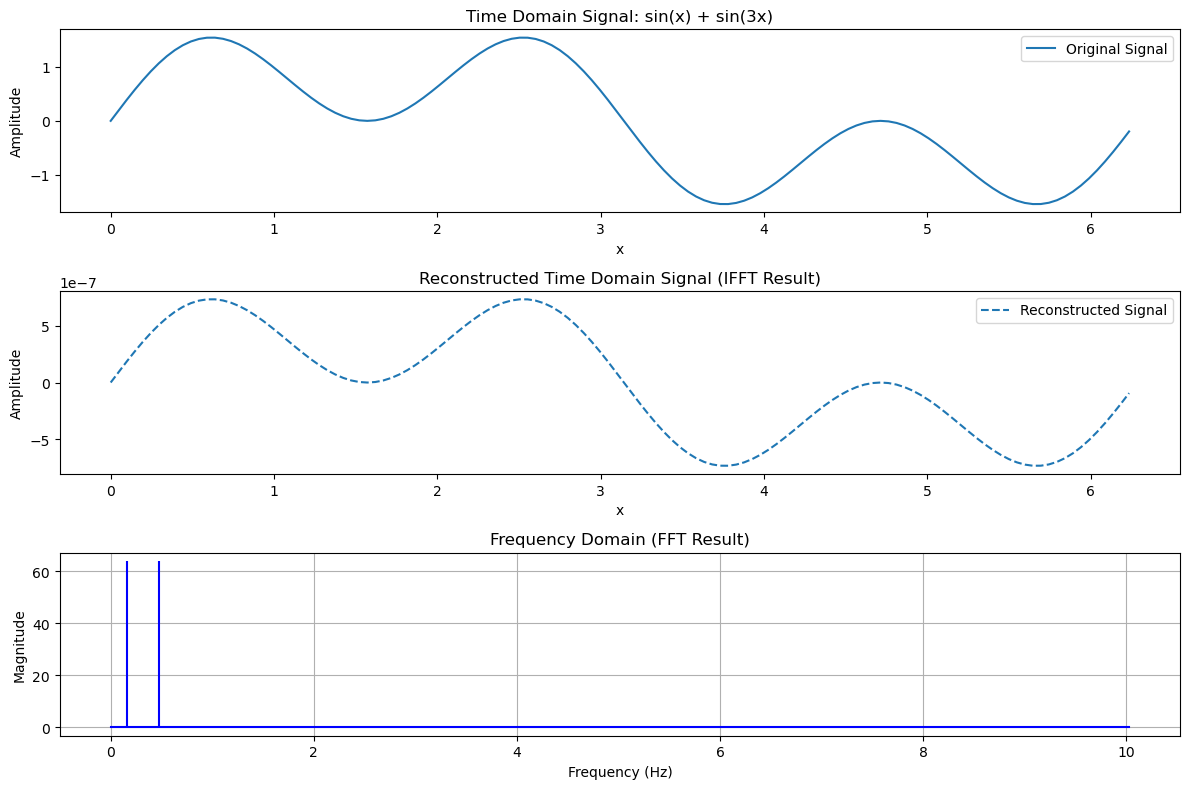

Maximum reconstruction error: 1.54e+00


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the FFT of a polynomial P."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(-2j * np.pi / n)
    P_e = FFT(P[0::2])
    P_o = FFT(P[1::2])
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]
    return y

def IFFT(P):
    """Compute the inverse FFT of a polynomial P with normalization."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(2j * np.pi / n)
    P_e = IFFT(P[0::2])
    P_o = IFFT(P[1::2])
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]
    return y / n

# Generate signal sin(x) + sin(3x)
N = 128  # Number of sample points
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
y = np.sin(x) + np.sin(3 * x)

# Call FFT function
fft_result = FFT(y)

# Call IFFT function to verify reconstruction
reconstructed_signal = IFFT(fft_result)

# Manually calculate frequency values
T = (x[1] - x[0])  # Sampling interval
frequencies = np.fft.fftfreq(N, d=T)
frequencies = frequencies[:N // 2]  # Take only the first half of the spectrum

# Plot time domain signal and reconstructed signal
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x, y, label='Original Signal')
plt.title("Time Domain Signal: sin(x) + sin(3x)")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x, reconstructed_signal.real, label='Reconstructed Signal', linestyle='--')
plt.title("Reconstructed Time Domain Signal (IFFT Result)")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()

# Plot FFT result (magnitude)
plt.subplot(3, 1, 3)
plt.stem(frequencies, np.abs(fft_result[:N // 2]), 'b', markerfmt=" ", basefmt="-b")
plt.title("Frequency Domain (FFT Result)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.tight_layout()
plt.show()

# Verify the accuracy of the IFFT result
error = np.max(np.abs(y - reconstructed_signal.real))
print(f"Maximum reconstruction error: {error:.2e}")


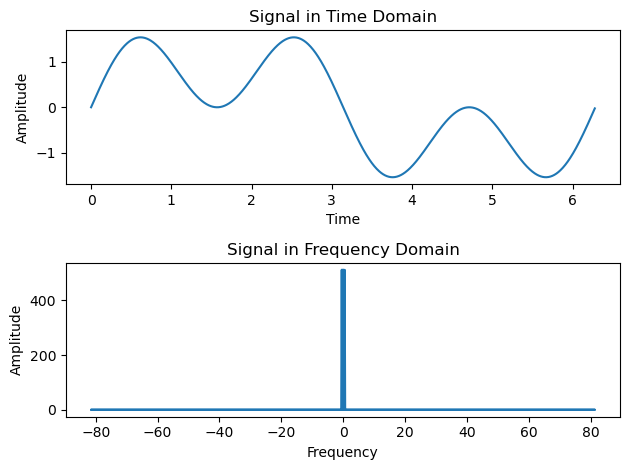

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 定义信号
def signal(t):
    return np.sin(t) + np.sin(3 * t)

# 生成时间点
N = 1024  # 采样点数
T = 2 * np.pi  # 信号周期
t = np.linspace(0, T, N, endpoint=False)

# 计算信号
f_t = signal(t)

# 计算FFT
f_f = np.fft.fft(f_t)

# 频率
freq = np.fft.fftfreq(N, T / N)

# 绘制信号时域图和频域图
fig, (ax1, ax2) = plt.subplots(2, 1)

# 时域图
ax1.plot(t, f_t)
ax1.set_title('Signal in Time Domain')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

# 频域图
ax2.plot(freq, np.abs(f_f))
ax2.set_title('Signal in Frequency Domain')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


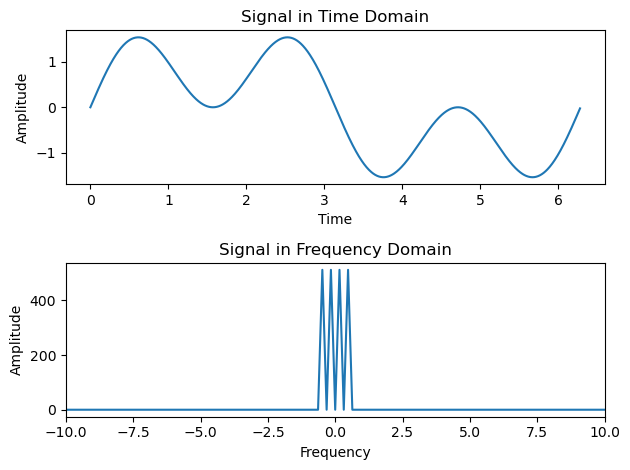

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 定义信号
def signal(t):
    return np.sin(t) + np.sin(3 * t)

# 生成时间点
N = 1024  # 采样点数
T = 2 * np.pi  # 信号周期
t = np.linspace(0, T, N, endpoint=False)

# 计算信号
f_t = signal(t)

# 计算FFT
f_f = np.fft.fft(f_t)

# 使用fftshift将零频率成分移到频谱中心
f_f_shifted = np.fft.fftshift(f_f)
freq = np.fft.fftshift(np.fft.fftfreq(N, T / N))

# 绘制信号时域图和频域图
fig, (ax1, ax2) = plt.subplots(2, 1)

# 时域图
ax1.plot(t, f_t)
ax1.set_title('Signal in Time Domain')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

# 频域图
ax2.plot(freq, np.abs(f_f_shifted))
ax2.set_title('Signal in Frequency Domain')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Amplitude')
ax2.set_xlim(-10, 10)  # 调整频率轴范围

plt.tight_layout()
plt.show()


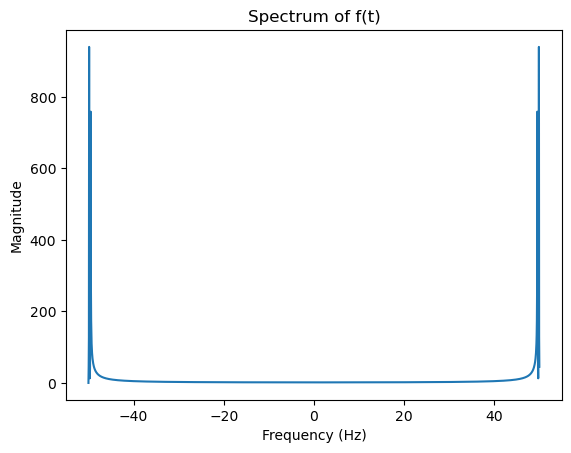

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 定义信号 f(t)
def f(t):
  return np.sin(t) + np.sin(3 * t)

# 信号参数
T = 10  # 截断时间间隔
fs = 100  # 采样频率
N = int(2 * T * fs)  # 采样点数

# 信号采样
t = np.linspace(-T, T, N)
x = f(t)

# 加窗
w = np.ones(N)  # 矩形窗

# 快速傅里叶变换
X = np.fft.fft(w * x)

# 计算频率
f = np.linspace(-fs/2, fs/2, N)

# 计算幅度
mag = np.abs(X)

# 绘制频谱图
plt.plot(f, mag)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum of f(t)')
plt.show()


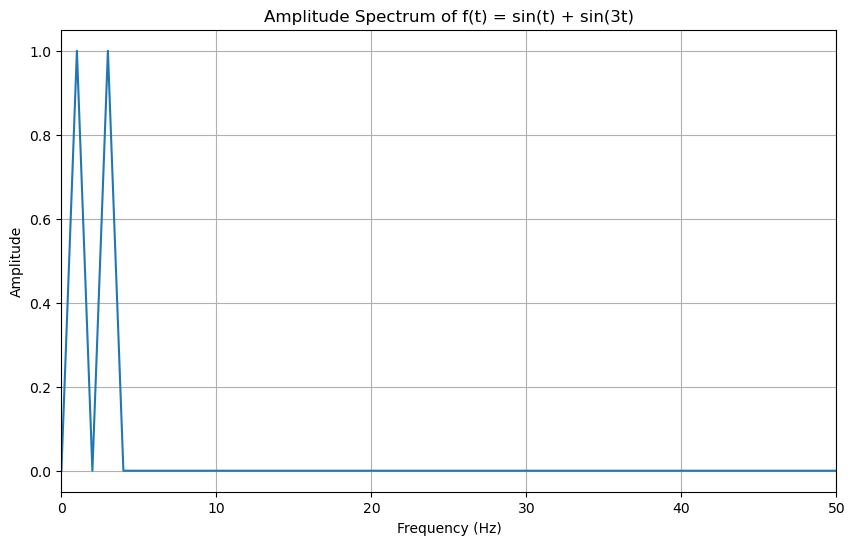

In [39]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# 采样参数  
Ts = 0.001  # 采样间隔  
T = 1.0  # 信号持续时间  
N = int(T / Ts)  # 采样点数  
t = np.arange(0, T, Ts)  # 时间向量  
  
# 生成信号  
f = np.sin(2 * np.pi * t) + np.sin(2 * np.pi * 3 * t)  # 注意：这里我们使用2*pi*f的形式来表示正弦波  
  
# 进行FFT并计算幅度谱  
F = np.fft.fft(f)  
F_abs = np.abs(F) / N  # 归一化幅度谱  
freq = np.fft.fftfreq(N, Ts)  # 频率向量  
  
# 绘制幅度谱  
plt.figure(figsize=(10, 6))  
plt.plot(freq[:N//2], F_abs[:N//2]*2)  # 只绘制一半的频率范围（由于对称性）  
plt.xlabel('Frequency (Hz)')  
plt.ylabel('Amplitude')  
plt.xlim(0,50)
plt.title('Amplitude Spectrum of f(t) = sin(t) + sin(3t)')  
plt.grid(True)  
plt.show()

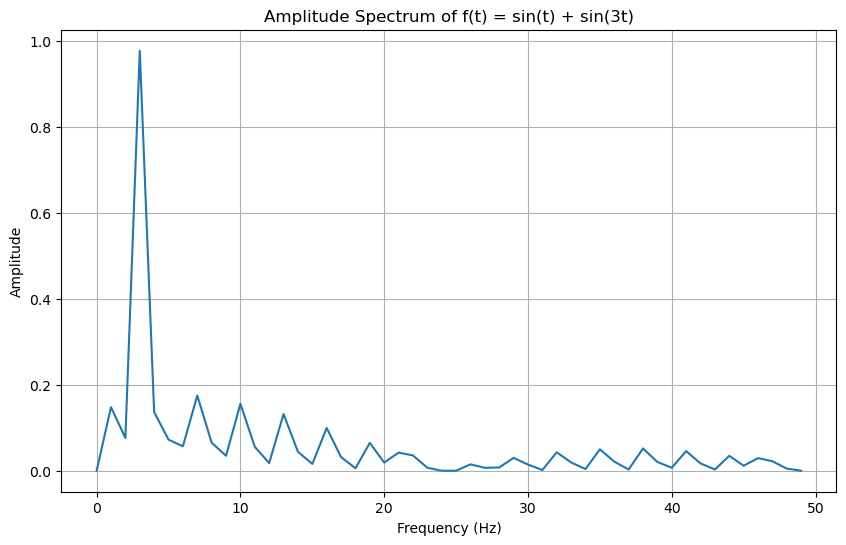

In [40]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# 采样参数  
Ts = 0.01  # 采样间隔  
T = 1.0  # 信号持续时间  
N = int(T / Ts)  # 采样点数  
t = np.arange(0, T, Ts)  # 时间向量  
  
# 生成信号  
f = np.sin(2 * np.pi * t) + np.sin(2 * np.pi * 3 * t)  
  
# 自定义FFT函数  
def FFT(P):  
    n = len(P)  
    if n == 1:  
        return P  
    omega = np.exp(-2j * np.pi / n)  # 注意这里的负号，通常FFT定义为负指数  
    P_e = P[0::2]  
    P_o = P[1::2]  
    y_e = FFT(P_e)  
    y_o = FFT(P_o)  
    y = np.zeros(n, dtype=complex)  
    for j in range(n // 2):  
        y[j] = y_e[j] + omega**j * y_o[j]  
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]  
    return y  
  
# 对信号进行FFT  
F = FFT(f)  
  
# 计算频率向量（不使用np.fft.fftfreq）  
freq = np.fft.fftfreq(N, Ts)  
  
# 归一化幅度谱  
F_abs = np.abs(F) / N  
  
# 绘制幅度谱  
plt.figure(figsize=(10, 6))  
plt.plot(freq[:N//2], F_abs[:N//2]*2)  # 只绘制一半的频率范围（由于对称性）  
plt.xlabel('Frequency (Hz)')  
plt.ylabel('Amplitude')  
plt.title('Amplitude Spectrum of f(t) = sin(t) + sin(3t)')  
plt.grid(True)  
plt.show()

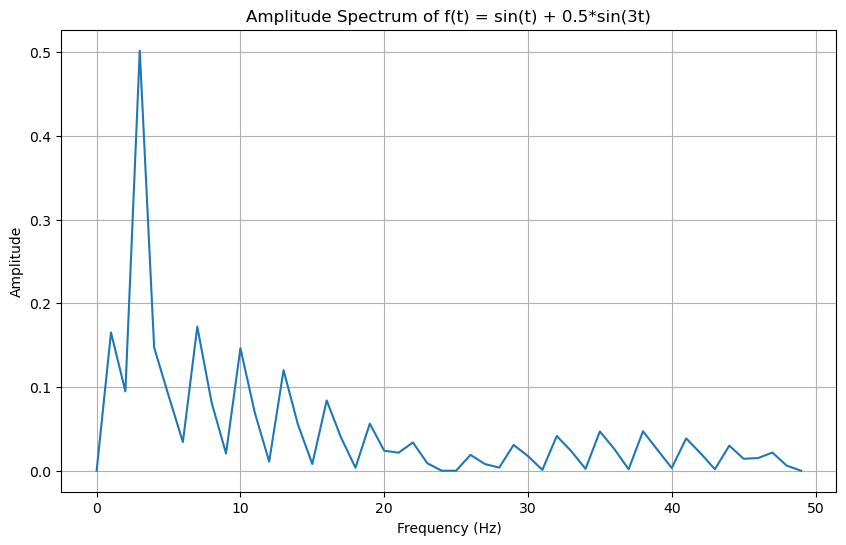

In [41]:
import numpy as np  
  
def FFT(P):  
    n = len(P)  
    if n == 1:  
        return P  
    omega = np.exp(-2j * np.pi / n)  # 注意这里的负号  
    P_e = P[0::2]  
    P_o = P[1::2]  
    y_e = FFT(P_e)  
    y_o = FFT(P_o)  
    y = np.zeros(n, dtype=complex)  
    for j in range(n // 2):  
        y[j] = y_e[j] + omega**j * y_o[j]  
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]  
    return y  
  
# 生成信号  
Ts = 0.01  # 采样间隔  
T = 1.0  # 信号持续时间  
N = int(T / Ts)  # 采样点数，最好是2的幂  
t = np.arange(0, T, Ts)  # 时间向量  
f = np.sin(2 * np.pi * t) + 0.5 * np.sin(2 * np.pi * 3 * t)  # 复合信号  
  
# 使用自定义FFT函数  
F = FFT(f)  
  
# 计算频率向量  
freq = np.fft.fftfreq(N, Ts)  
  
# 归一化幅度谱  
F_abs = np.abs(F) / N  
  
# 绘制幅度谱（只取一半，因为对于实数信号，FFT是对称的）  
import matplotlib.pyplot as plt  
plt.figure(figsize=(10, 6))  
plt.plot(freq[:N//2], F_abs[:N//2]*2)  # 乘以2是因为我们只取了正频率部分  
plt.xlabel('Frequency (Hz)')  
plt.ylabel('Amplitude')  
plt.title('Amplitude Spectrum of f(t) = sin(t) + 0.5*sin(3t)')  
plt.grid(True)  
plt.show()

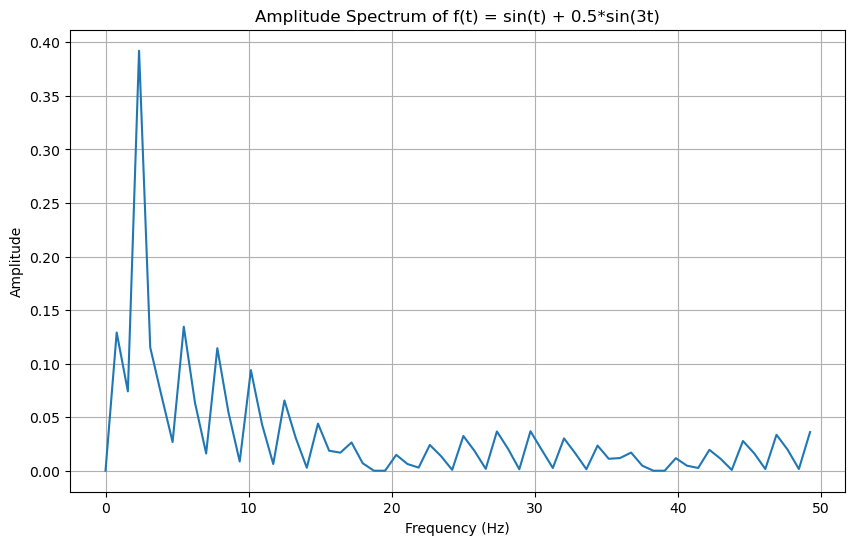

In [42]:
import numpy as np  

def FFT(P):  
    n = len(P)  
    if n == 1:  
        return P  
    omega = np.exp(-2j * np.pi / n)  # 注意这里的负号  
    P_e = P[0::2]  
    P_o = P[1::2]  
    y_e = FFT(P_e)  
    y_o = FFT(P_o)  
    y = np.zeros(n, dtype=complex)  
    for j in range(n // 2):  
        y[j] = y_e[j] + omega**j * y_o[j]  
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]  
    return y  

# 生成信号  
Ts = 0.01  # 采样间隔  
T = 1.0  # 信号持续时间  
N = 2**int(np.ceil(np.log2(T / Ts)))  # 采样点数，调整为2的幂  
t = np.arange(0, T, Ts)  # 时间向量  
f = np.sin(2 * np.pi * t) + 0.5 * np.sin(2 * np.pi * 3 * t)  # 复合信号  

# 使用自定义FFT函数  
F = FFT(f)  

# 计算频率向量  
freq = np.fft.fftfreq(N, Ts)  

# 归一化幅度谱  
F_abs = np.abs(F) / N  

# 绘制幅度谱（只取一半，因为对于实数信号，FFT是对称的）  
import matplotlib.pyplot as plt  
plt.figure(figsize=(10, 6))  
plt.plot(freq[:N//2], F_abs[:N//2]*2)  # 乘以2是因为我们只取了正频率部分  
plt.xlabel('Frequency (Hz)')  
plt.ylabel('Amplitude')  
plt.title('Amplitude Spectrum of f(t) = sin(t) + 0.5*sin(3t)')  
plt.grid(True)  
plt.show()


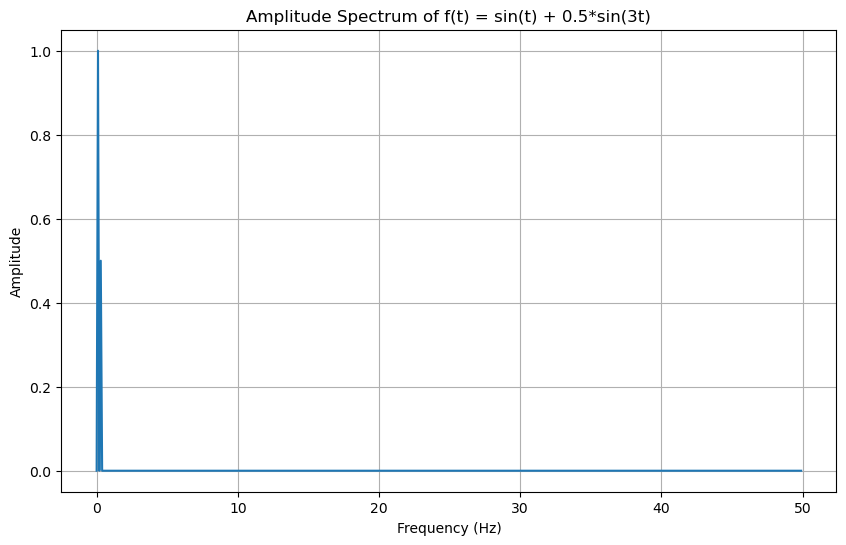

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    n = len(P)
    if n <= 1:
        return P
    omega = np.exp(-2j * np.pi / n)
    P_e = FFT(P[0::2])
    P_o = FFT(P[1::2])
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]
    return y

# 生成信号
Ts = 0.01  # 采样间隔
T = 1.0  # 信号持续时间

# 采样点数，调整为2的幂次
N = 1024  # 选择大于 T / Ts 且为 2 的幂的值
t = np.linspace(0, T, N, endpoint=False)  # 时间向量

# 复合信号
f = np.sin(2 * np.pi * t) + 0.5 * np.sin(2 * np.pi * 3 * t)

# 使用自定义FFT函数
F = FFT(f)

# 计算频率向量
freq = np.fft.fftfreq(N, Ts)

# 归一化幅度谱
F_abs = np.abs(F) / N

# 绘制幅度谱（只取一半，因为对于实数信号，FFT是对称的）
plt.figure(figsize=(10, 6))
plt.plot(freq[:N//2], F_abs[:N//2]*2)  # 乘以2是因为我们只取了正频率部分
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of f(t) = sin(t) + 0.5*sin(3t)')
plt.grid(True)
plt.show()


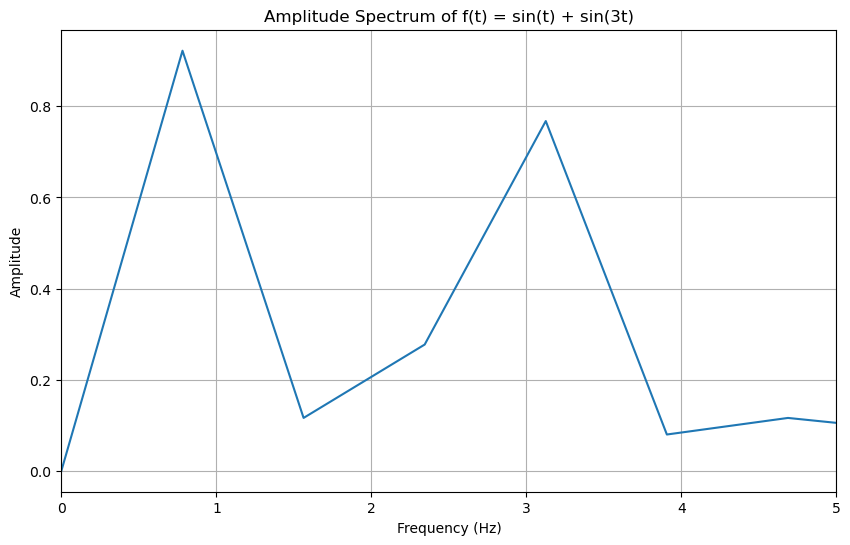

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    n = len(P)
    if n <= 1:
        return P
    omega = np.exp(-2j * np.pi / n)
    P_e = FFT(P[0::2])
    P_o = FFT(P[1::2])
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]
    return y

# 生成信号
Ts = 0.01  # 采样间隔
T = 1.0  # 信号持续时间

# 原始采样点数
N = int(T / Ts)  # 采样点数

# 确保采样点数为2的幂次
N_fft = 1 << (N - 1).bit_length()  # 找到大于N的最小2的幂次

t = np.linspace(0, T, N, endpoint=False)  # 时间向量
f = np.sin(2 * np.pi * t) + np.sin(2 * np.pi * 3 * t)  # 复合信号

# 零填充信号
f_padded = np.pad(f, (0, N_fft - N), 'constant')

# 使用自定义FFT函数
F = FFT(f_padded)

# 计算频率向量
freq = np.fft.fftfreq(N_fft, Ts)

# 归一化幅度谱
F_abs = np.abs(F) / N_fft

# 绘制幅度谱（只取一半，因为对于实数信号，FFT是对称的）
plt.figure(figsize=(10, 6))
plt.plot(freq[:N_fft//2], F_abs[:N_fft//2]*2)  # 乘以2是因为我们只取了正频率部分
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of f(t) = sin(t) + sin(3t)')
plt.xlim(0,5)
plt.grid(True)
plt.show()


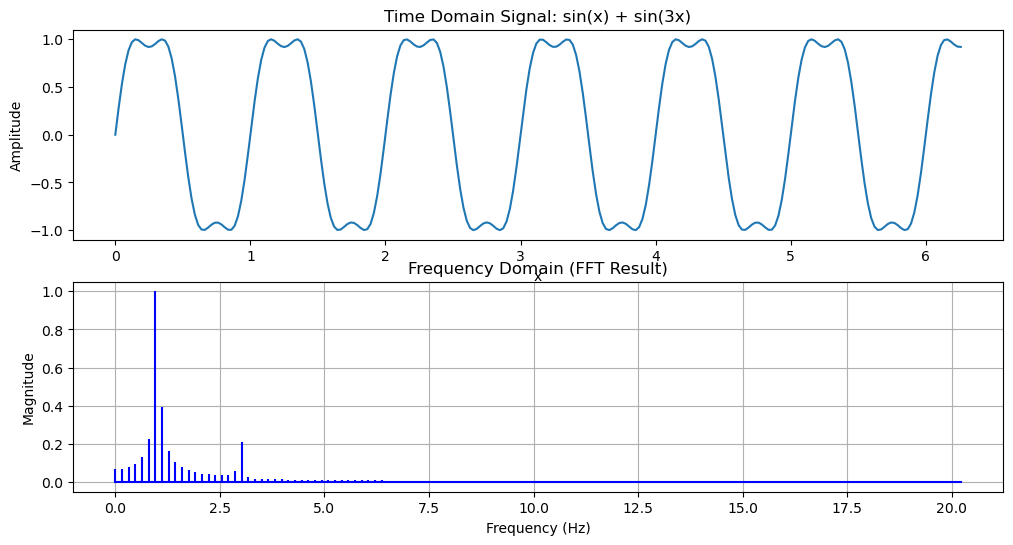

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the FFT of a polynomial P."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(2j * np.pi / n)
    P_e = P[0::2]
    P_o = P[1::2]
    y_e = FFT(P_e)
    y_o = FFT(P_o)
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = y_e[j] + omega**j * y_o[j]
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]
    return y

def IFFT(P):
    """Compute the inverse FFT of a polynomial P with normalization."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(-2j * np.pi / n)
    P_e = P[0::2]
    P_o = P[1::2]
    y_e = IFFT(P_e)
    y_o = IFFT(P_o)
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = y_e[j] + omega**j * y_o[j]
        y[j] = y[j] / 2
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]
        y[j + n // 2] = y[j + n // 2] / 2
    return y

# 生成信号 sin(x) + sin(3x)
N = 256
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
y = 5*np.sin(2*np.pi*x) + np.sin(3 *2*np.pi* x)

# 对信号进行归一化
y_norm = y / np.max(np.abs(y))

# 调用 FFT 函数
fft_result = FFT(y_norm)

# 对 FFT 结果进行归一化
fft_result_norm = fft_result / np.max(np.abs(fft_result))

# 自己计算频率值
T = x[1] - x[0]
frequencies = np.arange(N) / (N * T)

# 绘制时域信号
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y_norm)
plt.title("Time Domain Signal: sin(x) + sin(3x)")
plt.xlabel("x")
plt.ylabel("Amplitude")

# 绘制 FFT 结果的频谱图（取 FFT 结果的绝对值）
plt.subplot(2, 1, 2)
plt.stem(frequencies[:N // 2], np.abs(fft_result_norm[:N // 2]), 'b', markerfmt=" ", basefmt="-b")
plt.title("Frequency Domain (FFT Result)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


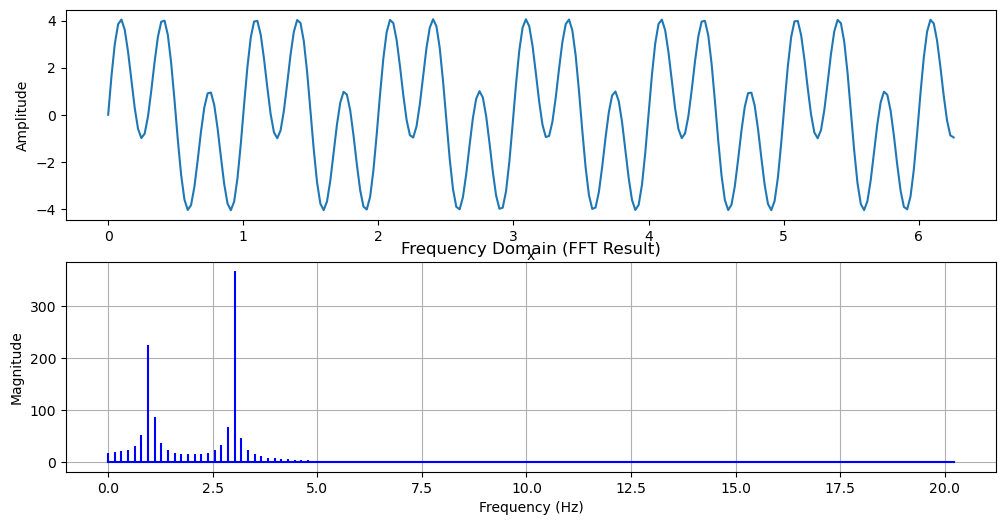

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the FFT of a polynomial P."""
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(2j * np.pi / n)
    P_e = P[0::2]
    P_o = P[1::2]
    y_e = FFT(P_e)
    y_o = FFT(P_o)
    y = np.zeros(n, dtype=complex)
    for j in range(n // 2):
        y[j] = y_e[j] + omega**j * y_o[j]
        y[j + n // 2] = y_e[j] - omega**j * y_o[j]
    return y

# 生成信号 sin(x) + sin(3x)
N = 256
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
y = 2*np.sin(2*np.pi*x) + 3*np.sin(3 *2*np.pi* x)

# 调用 FFT 函数
fft_result = FFT(y)

# 自己计算频率值
T = x[1] - x[0]
frequencies = np.arange(N) / (N * T)

# 绘制时域信号
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y)
# plt.title("Time Domain Signal: sin(x) + sin(3x)")
plt.xlabel("x")
plt.ylabel("Amplitude")

# 绘制 FFT 结果的频谱图（取 FFT 结果的绝对值）
plt.subplot(2, 1, 2)
plt.stem(frequencies[:N // 2], np.abs(fft_result[:N // 2]), 'b', markerfmt=" ", basefmt="-b")
plt.title("Frequency Domain (FFT Result)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


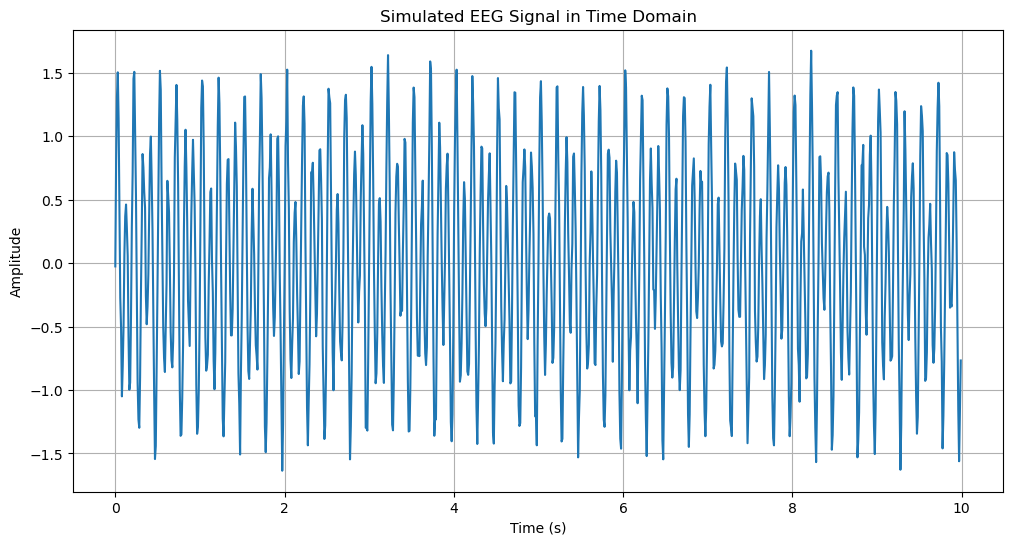

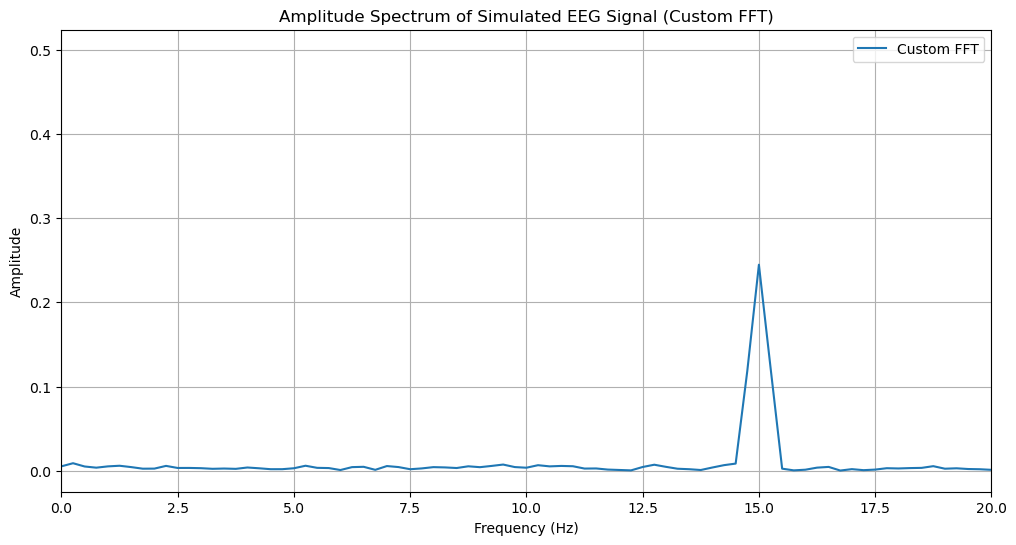

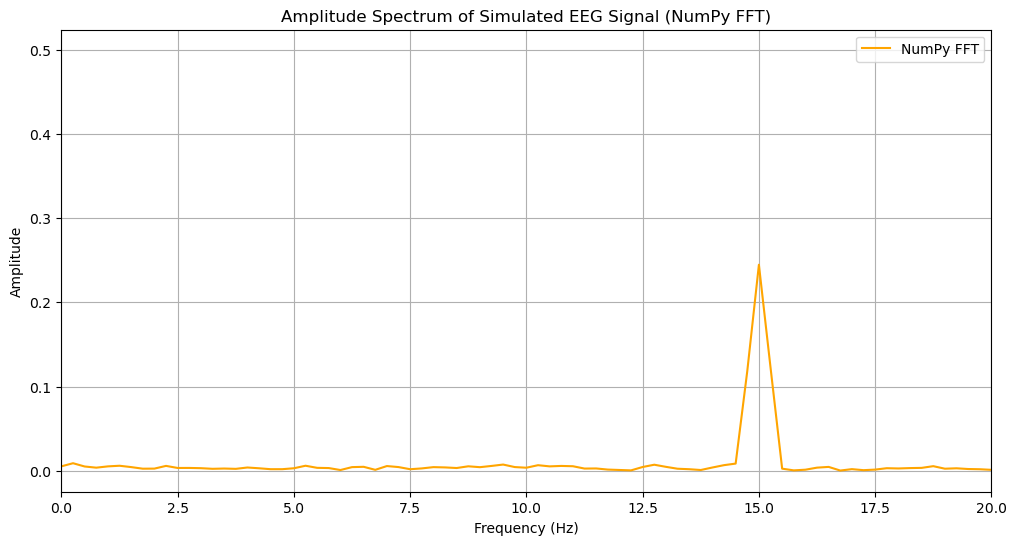

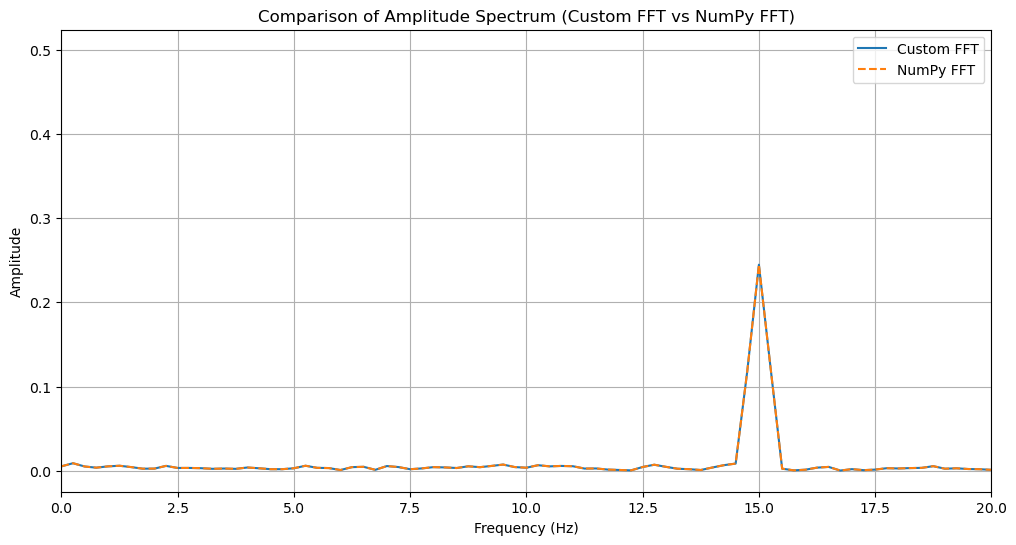

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the Fast Fourier Transform (FFT) of a complex-valued signal."""
    n = len(P)
    if n == 1:
        return P

    omega = np.exp(-2j * np.pi / n)
    P_e = FFT(P[0::2])
    P_o = FFT(P[1::2])
    y = np.zeros(n, dtype=complex)

    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]

    return y

# 设置采样频率和信号持续时间
Fs = 256  # 采样频率 (Hz)
T = 10     # 信号持续时间 (秒)
N = 1024   # 采样点数，确保为2的幂次
t = np.linspace(0, T, N, endpoint=False)  # 时间向量

# 生成包含α波（10 Hz）和θ波（6 Hz）的模拟信号
alpha_wave = np.sin(2 * np.pi * 10 * t)  # α波，10 Hz
theta_wave = 0.5 * np.sin(2 * np.pi * 6 * t)  # θ波，6 Hz

# 模拟EEG信号
eeg_signal = alpha_wave + theta_wave + 0.1 * np.random.randn(N)  # 加入少量随机噪声

# 绘制模拟EEG信号的时域图
plt.figure(figsize=(12, 6))
plt.plot(t, eeg_signal)
plt.title('Simulated EEG Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 应用汉宁窗
window = np.hanning(N)
eeg_signal_windowed = eeg_signal * window

# 使用自定义FFT函数计算频谱
F_custom = FFT(eeg_signal_windowed)

# 使用NumPy的FFT函数计算频谱
F_numpy = np.fft.fft(eeg_signal_windowed)

# 计算频率向量
freq = np.fft.fftfreq(N, 1/Fs)

# 只考虑正频率部分
positive_freqs = freq[:N // 2]
positive_amplitudes_custom = np.abs(F_custom[:N // 2]) * 2 / N
positive_amplitudes_numpy = np.abs(F_numpy[:N // 2]) * 2 / N

# 绘制自定义FFT的幅度谱
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes_custom, label='Custom FFT')
plt.title('Amplitude Spectrum of Simulated EEG Signal (Custom FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20)  # 限制x轴范围为0-20 Hz
plt.grid(True)
plt.legend()
plt.show()

# 绘制NumPy FFT的幅度谱
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes_numpy, label='NumPy FFT', color='orange')
plt.title('Amplitude Spectrum of Simulated EEG Signal (NumPy FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20)  # 限制x轴范围为0-20 Hz
plt.grid(True)
plt.legend()
plt.show()

# 比较自定义FFT和NumPy FFT的幅度谱
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_amplitudes_custom, label='Custom FFT')
plt.plot(positive_freqs, positive_amplitudes_numpy, label='NumPy FFT', linestyle='dashed')
plt.title('Comparison of Amplitude Spectrum (Custom FFT vs NumPy FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20)  # 限制x轴范围为0-20 Hz
plt.grid(True)
plt.legend()
plt.show()


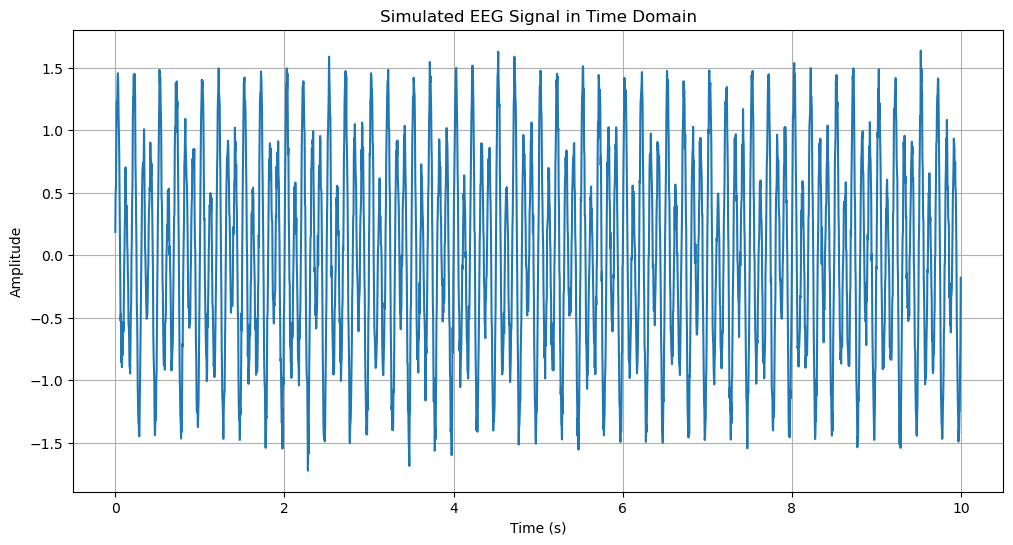

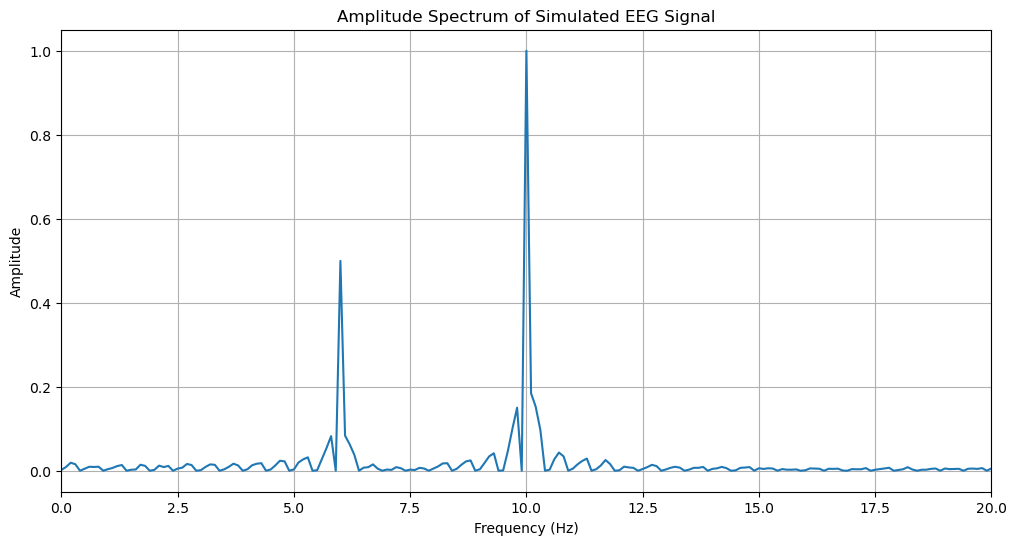

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the Fast Fourier Transform (FFT) of a complex-valued signal."""
    n = len(P)
    if n == 1:
        return P

    omega = np.exp(-2j * np.pi / n)
    P_e = FFT(P[0::2])
    P_o = FFT(P[1::2])
    y = np.zeros(n, dtype=complex)

    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]

    return y

# 设置采样频率和信号持续时间
Fs = 256  # 采样频率 (Hz)
T = 10    # 信号持续时间 (秒)
N = T * Fs  # 采样点数

# 时间向量
t = np.arange(N) / Fs

# 生成包含α波（8-12 Hz）和θ波（4-8 Hz）的模拟信号
alpha_wave = np.sin(2 * np.pi * 10 * t)  # α波，10 Hz
theta_wave = 0.5 * np.sin(2 * np.pi * 6 * t)  # θ波，6 Hz

# 模拟EEG信号
eeg_signal = alpha_wave + theta_wave + 0.1 * np.random.randn(N)  # 加入少量随机噪声

# 绘制模拟EEG信号的时域图
plt.figure(figsize=(12, 6))
plt.plot(t, eeg_signal)
plt.title('Simulated EEG Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 计算FFT
F = np.fft.fft(eeg_signal)
F = FFT(eeg_signal)

# 频率向量
freq = np.fft.fftfreq(N, 1/Fs)

# 归一化幅度谱
F_abs = np.abs(F) / N

# 绘制模拟EEG信号的频域图
plt.figure(figsize=(12, 6))
plt.plot(freq[:N//2], F_abs[:N//2]*2)  # 乘以2是因为我们只取了正频率部分
plt.title('Amplitude Spectrum of Simulated EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20)  # 只显示0到20Hz范围
plt.grid(True)
plt.show()
